# eXplainable Machine Learning Lab 3 (extension of Lab 1)
Tomasz Siłkowski 407106


In this homework I was tasked with training a couple of models on a dataset.  
For my dataset I've selected [phoneme dataset](https://www.openml.org/search?type=data&sort=runs&id=1489&status=active) from OpenML-100. It contains accustical measurements of given sounds and a flag whether a given combination is a nasal or an oral sound.
Variables `V1` - `V5` are floating point numbers (with mean 0 and standard deviation 1), `Class` variable is a binary one. This makes this task a binary classification.

In [ ]:
# @title Data preview { display-mode: "form" }
df_data

,V1,V2,V3,V4,V5,Class
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418,0
1,-0.641265,0.109245,0.292130,-0.916804,0.240223,0
2,0.870593,-0.459862,0.578159,0.806634,0.835248,0
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583,0
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127,0
...,...,...,...,...,...,...
5399,-0.658318,1.331760,-0.081621,1.794253,-1.082181,0
5400,-0.044375,-0.010512,0.030989,-0.019379,1.281061,1
5401,0.246882,-0.793228,1.190101,1.423194,-1.303036,1
5402,-0.778907,-0.383111,1.727029,-1.432389,-1.208085,0


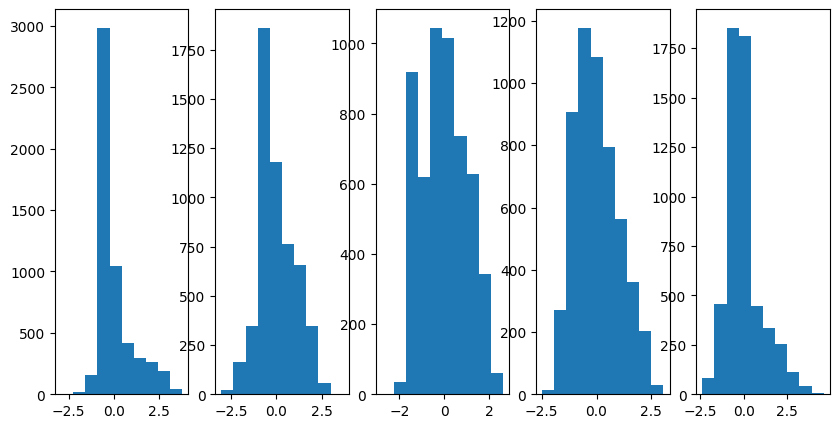

In [ ]:
# @title Histograms { display-mode: "form" }
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for ax, column in zip(axes, [f'V{i}' for i in range(1, 6)]):
    ax.hist(df_data[column])
plt.show()

In [ ]:
# @title `Class` counts { display-mode: "form" }
df_data['Class'].value_counts()

0    3818
1    1586
Name: Class, dtype: int64

<Axes: >

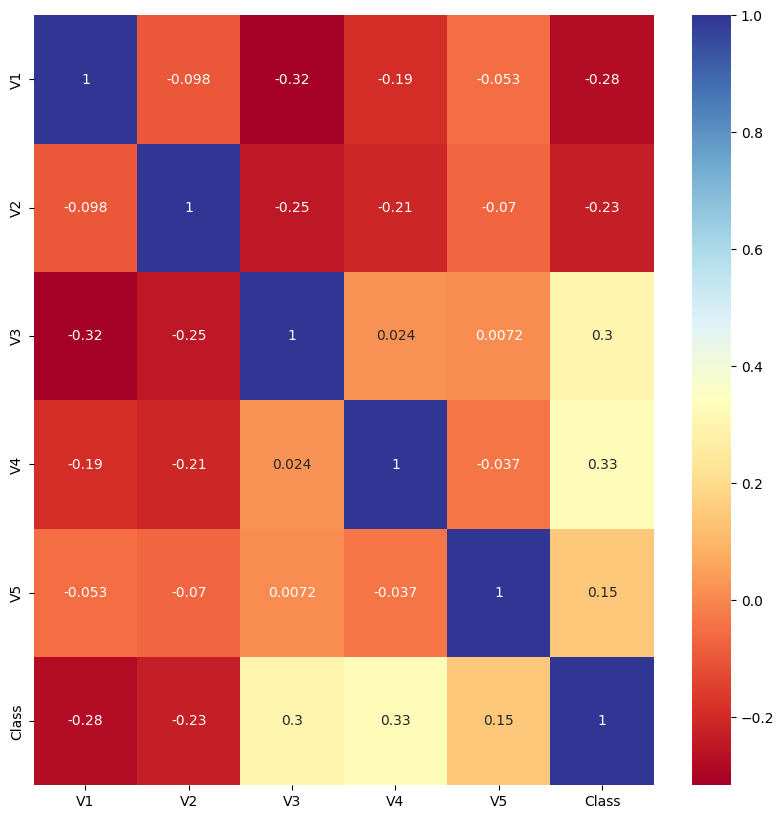

In [ ]:
# @title Correlation matrix { display-mode: "form" }
plt.figure(figsize=(10, 10))
sns.heatmap(df_data.corr(), cbar=True, annot=True, cmap='RdYlBu')

In [ ]:
# @title Training results { display-mode: "form" }
df_results

,Logistic Regression,XgBoost,Random Forest
Training Score,0.751789,0.994078,0.949281
Testing Score,0.743893,0.895633,0.647450


<Axes: >

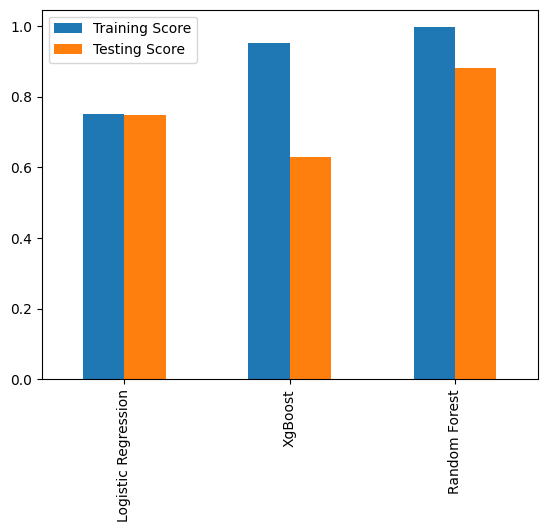

In [189]:
# @title Results of training { display-mode: "form" }
df_results.transpose().plot(kind='bar')

Following models were trained: Logistic Regression, Xgboost and Random Forest.  
Logistic Regression offered least overfit results that were middle of the pack -- 74.3% accuracy. Random Forest has overfit heavily, pushing its test score to the bottom at 64.7%, while XgBoost came up on top with heighest test score of 89.5% accuracy.

## Prediction explanations


After training all three models on the same data, a representative selection of data was chosen to show examples where models are correct, all fail and scenarios in between.

In [233]:
display(df_predictions)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Ground Truth,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
Linear Regression,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
XgBoost,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
Random Forest,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


The following are explanations for all three models of predictions of data input number 10, where linear regression and XgBoost failed to predict correctly, but random forest did.

In [240]:
show_explanations(10)

V1   -1.563204
V2   -2.361983
V3   -1.746185
V4   -1.232939
V5    2.128311
Name: 1771, dtype: float64

Ground Truth         1.0
Linear Regression    0.0
XgBoost              0.0
Random Forest        1.0
Name: 10, dtype: float64

,variable,effect
0,V3 <= -0.95,-0.166289
1,V4 <= -0.76,-0.150777
2,V1 <= -0.67,0.120538
3,V5 > 0.20,0.103187
4,V2 <= -0.78,0.096516


,variable,effect
0,V5 > 0.20,0.092915
1,V3 <= -0.95,-0.062909
2,V4 <= -0.76,0.039330
3,V2 <= -0.78,0.034791
4,V1 <= -0.67,-0.004344


,variable,effect
0,V2 <= -0.78,0.106052
1,V5 > 0.20,0.091044
2,V3 <= -0.95,-0.062218
3,V1 <= -0.67,-0.052158
4,V4 <= -0.76,-0.030345


From this example we can see that most conditions used in models were the same, but the effect assigned to them was the difference causing the models to predict differently.
Next, let's see explanations for data input number 11, where only Xgboost predicted correctly.

In [241]:
show_explanations(11)

V1   -0.045962
V2    0.484155
V3    0.527480
V4    0.312660
V5    0.882644
Name: 4559, dtype: float64

Ground Truth         1.0
Linear Regression    0.0
XgBoost              1.0
Random Forest        0.0
Name: 11, dtype: float64

,variable,effect
0,V5 > 0.20,0.107254
1,-0.04 < V3 <= 0.78,0.026426
2,-0.14 < V4 <= 0.68,0.020343
3,-0.22 < V2 <= 0.71,-0.017001
4,-0.38 < V1 <= 0.31,0.001547


,variable,effect
0,-0.38 < V1 <= 0.31,0.123214
1,V5 > 0.20,0.065048
2,-0.04 < V3 <= 0.78,0.056301
3,-0.22 < V2 <= 0.71,-0.023151
4,-0.14 < V4 <= 0.68,-0.014186


,variable,effect
0,-0.38 < V1 <= 0.31,0.195770
1,-0.04 < V3 <= 0.78,0.124912
2,V5 > 0.20,0.107749
3,-0.22 < V2 <= 0.71,-0.050679
4,-0.14 < V4 <= 0.68,-0.002228


Similar story here -- variable conditions are the same, effects cause the difference.
Moving onto examples 0 and 19, where all models were either simulatnously  correct or simulatnously wrong.


In [242]:
show_explanations(0)

V1    0.519051
V2    1.119612
V3   -1.193808
V4   -0.709655
V5    0.449607
Name: 1580, dtype: float64

Ground Truth         0.0
Linear Regression    0.0
XgBoost              0.0
Random Forest        0.0
Name: 0, dtype: float64

,variable,effect
0,V1 > 0.31,-0.172753
1,V3 <= -0.95,-0.151575
2,V2 > 0.71,-0.114631
3,V5 > 0.20,0.108231
4,-0.76 < V4 <= -0.14,-0.070164


,variable,effect
0,-0.76 < V4 <= -0.14,-0.227975
1,V1 > 0.31,-0.172084
2,V2 > 0.71,-0.111484
3,V3 <= -0.95,-0.087415
4,V5 > 0.20,0.064410


,variable,effect
0,-0.76 < V4 <= -0.14,-0.253314
1,V1 > 0.31,-0.243959
2,V2 > 0.71,-0.162953
3,V5 > 0.20,0.105068
4,V3 <= -0.95,-0.074239


In [243]:
show_explanations(19)

V1   -1.076971
V2   -0.825583
V3    0.212283
V4    1.543416
V5   -1.635543
Name: 3369, dtype: float64

Ground Truth         1.0
Linear Regression    0.0
XgBoost              0.0
Random Forest        0.0
Name: 19, dtype: float64

,variable,effect
0,V4 > 0.68,0.211957
1,V1 <= -0.67,0.116092
2,V2 <= -0.78,0.103384
3,V5 <= -0.54,-0.079363
4,-0.04 < V3 <= 0.78,0.032585


,variable,effect
0,V4 > 0.68,0.199012
1,-0.04 < V3 <= 0.78,0.057029
2,V2 <= -0.78,0.050937
3,V5 <= -0.54,0.019151
4,V1 <= -0.67,-0.010017


,variable,effect
0,V4 > 0.68,0.263694
1,-0.04 < V3 <= 0.78,0.134670
2,V2 <= -0.78,0.080971
3,V5 <= -0.54,0.059147
4,V1 <= -0.67,-0.047804


Both of these examples show uniformity among the models that yielded either a correct result or an opposite one.

Analysis of explanations provided by LIME did not show any systematic differences between the models: all had unique errors, all had common errors, sometimes all were right, sometimes none and every combination in between.  
This could be due to simplicity of the dataset or lack of intuitive information behind the data -- afterall it's quite an abstract representation of tones.

# Appendix
Code used for this analysis

In [149]:
import random

import dalex as dx
import lime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split


raw_data = loadarff('php8Mz7BG.arff')
df_data = pd.DataFrame(raw_data[0])
df_data['Class'] = df_data['Class'].map({df_data.at[1, 'Class']: 0, df_data.at[10, 'Class']: 1})

In [123]:
np.random.seed(21)
random.seed(21)
df_data_x = df_data.loc[:, df_data.columns != 'Class']
df_data_y = df_data.loc[:, df_data.columns == 'Class']
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_data_x, df_data_y, shuffle=True)

In [180]:
def calc_accuracy(y_true, y_pred):
    return sum(y_true == y_pred)/len(y_true)


def train_logistic_regression(df_train_x, df_test_x, df_train_y, df_test_y):
    model = LogisticRegression()
    model.fit(df_train_x, df_train_y)
    train_score = model.score(df_train_x, df_train_y)
    test_score = model.score(df_test_x, df_test_y)

    return model, train_score, test_score


def train_random_forest(df_train_x, df_test_x, df_train_y, df_test_y):
    model = RandomForestRegressor()
    model.fit(df_train_x, df_train_y)
    train_score = model.score(df_train_x, df_train_y)
    test_score = model.score(df_test_x, df_test_y)

    return model, train_score, test_score


def train_xgboost(df_train_x, df_test_x, df_train_y, df_test_y):
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    model.fit(df_train_x, df_train_y)
    y_train_pred = model.predict(df_train_x)
    y_test_pred = np.round(model.predict(df_test_x))
    return (model,
            calc_accuracy(df_train_y.to_numpy().flatten(), y_train_pred),
            calc_accuracy(df_test_y.to_numpy().flatten(), y_test_pred))

In [188]:
model_lr, lr_train_score, lr_test_score = train_logistic_regression(df_train_x, df_test_x, df_train_y, df_test_y)
model_xgb, xgb_train_score, xgb_test_score = train_random_forest(df_train_x, df_test_x, df_train_y, df_test_y)
model_rf, rf_train_score, rf_test_score = train_xgboost(df_train_x, df_test_x, df_train_y, df_test_y)
models = [model_lr, model_xgb, model_rf]

df_results = pd.DataFrame(
    index = ['Training Score', 'Testing Score'],
    data =
     {
    'Logistic Regression': [lr_train_score, lr_test_score],
    'XgBoost': [xgb_train_score, xgb_test_score],
    'Random Forest': [rf_train_score, rf_test_score],
    }
)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-180-a94fdd9f1486>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df_train_x, df_train_y)


In [230]:
def select_interesting_data(n, df_test_x, df_test_y, models):
    selected_idx = []
    predictions = []
    differences = []
    for model in models:
        predictions.append(np.round(model.predict(df_test_x).flatten()))
        differences.append(np.where(predictions[-1] - df_test_y.to_numpy().flatten() == 0, 0, 1))
    difficulty = np.array(differences).sum(axis=0)
    total_buckets = len(models)+1
    for d in range(total_buckets):
        d_idx = np.where(difficulty == d)[0]
        selected_idx.extend(np.random.choice(d_idx, min(n//total_buckets, len(d_idx)), replace=False).tolist())
    return selected_idx

In [231]:
total_interesting_samples = 20

selected_idx = select_interesting_data(total_interesting_samples, df_test_x, df_test_y, models)
selected_x = df_test_x.iloc[selected_idx, :]
selected_y = df_test_y.iloc[selected_idx, :]

In [226]:
df_predictions = pd.DataFrame(
    index = ['Ground Truth', 'Linear Regression', 'XgBoost', 'Random Forest'],
    data = selected_y.values.T.tolist() + [[np.round(model.predict(x.values.reshape(1, -1))[0]) \
            for _, x in selected_x.iterrows()] \
            for model in models],
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

In [228]:
lr_explainer = dx.Explainer(model_lr, df_data_x, df_data_y)
xgb_explainer = dx.Explainer(model_xgb, df_data_x, df_data_y)
rf_explainer = dx.Explainer(model_rf, df_data_x, df_data_y)

Preparation of a new explainer is initiated

  -> data              : 5404 rows 5 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 5404 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7c8ab6e8f910> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0159, mean = 0.292, max = 0.886
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.808, mean = 0.00152, max = 0.976
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 5404 rows 5 cols
  -> target variable 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [239]:
def show_explanations(i):
    display(selected_x.iloc[i])
    display(df_predictions.iloc[:, i])
    display(lr_explainer.predict_surrogate(selected_x.iloc[i]).result)
    display(xgb_explainer.predict_surrogate(selected_x.iloc[i]).result)
    display(rf_explainer.predict_surrogate(selected_x.iloc[i]).result)